In [1]:
%matplotlib inline

import numpy as np
import splitwavepy as sw

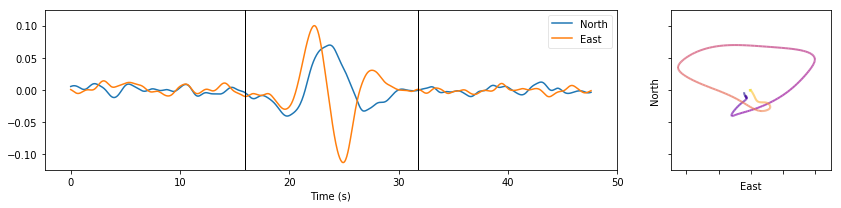

In [4]:
a = sw.Data(split=[(30,1.2),(50,1.2)], delta=0.05, noise=0.03)
a.plot()

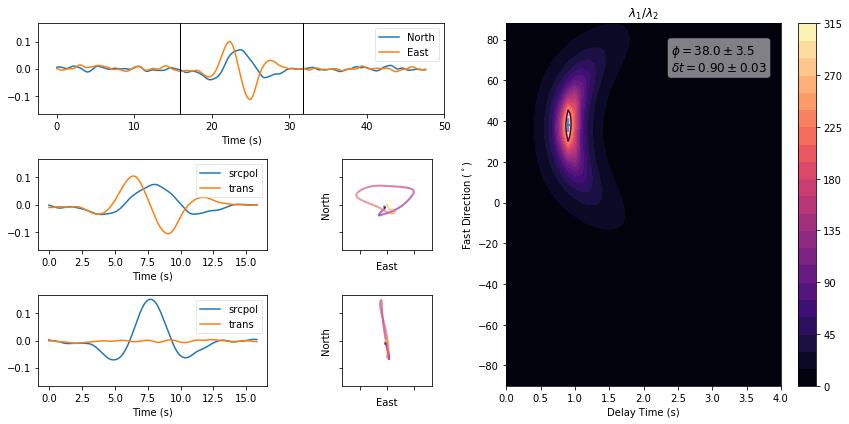

In [8]:
a.EigenM(rcvcorr=(40,1.2)).plot()

# The idea

Use bootstrapping to calculate the 95% confidence interval of the test statistic.  In the case of EigenM this will be $\lambda_2$ (or some combination of $\lambda_1$ and $\lambda_2$). In the case of the cross-correlation method this will be the absolute value of the Pearson correlation co-efficient.

The algorithm should trial a receiver correction, then calculate the test statistic at the "correct" solution. Bootstrap resampling of the data points should be used to get a population of values. This process should be repeated many times to build up a population of possible test statistics.  The 95% confidence contour can then be measured directly from the population.

In [9]:
def _bootstrap_samp(x, y):
    idx = np.random.choice(x.size, x.size)
    return x[idx], y[idx]

def _trial_correction(data, fast, lag):
    # apply correction to data
    x, y = data.unsplit(correction).chopdata()
    
def _get_random_corr(x, dx):
    return np.random.normal(x, dx)

def rcvcorr_err(fast, dfast, lag, dlag, n=10):
    
    for t_fast, t_lag in zip(
        np.random.normal(fast, dfast, n),
        np.random.normal(lag, dlag, n)):
        
        print(t_fast, t_lag)


# a = sw.Data(delta=0.1, noise=0.01)
# x, y = a.chopdata()
# xc = np.abs(sw.core.core.crosscorr(x, y))
# bslist = [ sw.core.core.crosscorr(*_bootstrap_samp(x, y)) for ii in range(10000) ]
# bsarray = np.abs(np.asarray(bslist))
# plt.hist(bsarray, bins=100)

# # the original measured lam1/lam2 in red
# plt.axvline(xc, color='r')
# # the bootstrapmean lam1/lam2 in black
# mean = np.mean(bsarray)
# std = np.std(bsarray)
# plt.axvline(mean, color='k', alpha=0.02)
# plt.axvline(mean-1.96*std, color='k', linestyle='--')
# plt.axvline(mean+1.96*std, color='k', linestyle='--')
# # the bootstrap confidence limits
# median = np.percentile(bsarray,50)
# lower95 = np.percentile(bsarray,2.5)
# upper95 = np.percentile(bsarray,97.5)
# plt.axvline(median, color='g', alpha=0.02)
# plt.axvline(lower95, color='g', linestyle='--')
# plt.axvline(upper95, color='g', linestyle='--')
# plt.show()
# a.plot()

In [10]:
rcvcorr_err(14,3,2,.4)

17.2033768578 2.01382455906
14.798549237 1.63904086794
18.3717399042 2.06134352763
9.69030326949 2.41473918166
14.7140684761 1.81415875203
17.0727180085 1.78452796743
9.36014451409 1.31676279718
13.7392361085 1.93991522733
16.1758904714 2.40179193945
11.8402715346 1.97092889015
